# Code to input data for mini-project I

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Let's read the data using pandas.
import pandas
url = "https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat"
names = ['x_data', 'y_data', 'dy_data']
# Note that the data file uses one or more tabs as separators. So the regex '\t+' is needed
# and this calls for engine='python'
# Comment lines starting with '#' should be ignored
data = pandas.read_csv(url, names=names, sep='\t+', engine='python', comment='#')
print(f'Read data from {url} into a pandas data frame with shape: {data.shape}')
print('This data must be used to reproduce the results in Table III')
display(data)

# Copy the data into numpy arrays

x_data_pts = data['x_data'].to_numpy()
y_data_pts = data['y_data'].to_numpy()
dy_data = data['dy_data'].to_numpy()



Read data from https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat into a pandas data frame with shape: (10, 3)
This data must be used to reproduce the results in Table III


,x_data,y_data,dy_data
0,0.03183,0.31694,0.015850
1,0.06366,0.33844,0.016920
2,0.09549,0.42142,0.021070
3,0.12732,0.57709,0.028850
4,0.15915,0.56218,0.028110
5,0.19099,0.68851,0.034430
6,0.22282,0.73625,0.036810
7,0.25465,0.87270,0.043640
8,0.28648,1.00150,0.050075
9,0.31831,1.06840,0.053420


In [3]:
def g_fun(x):
    """
    Toy function to model an EFT expansion.  It has a Taylor expansion about
    x=0 with a radius of convergence of 1.
    """
    return (0.5 + np.tan(np.pi * x / 2.))**2

def y_model(x_pts, theta, orders=None):
    """
    Returns the evaluation of the theoretical model at all x values in the
    numpy array x_pts, using coefficients from theta, where orders is the
    number of coefficients to use (if orders is not specified in the call
    to y_model, it is assigned None and this means to use all the coefficients 
    in theta).
    
    The theoretical model is (with n = orders - 1):
      y_model(x) = theta_0 + theta_1 * x + ... + theta_n * x**n
                 = \sum_{i=0}^{orders} theta_i x^i
                 
    This is cleanly implemented using a nested list comprehension.             
    """
    
    if orders is None:   # use the full theta vector
        orders = len(theta)
    
    return np.array( [ np.sum(
                               [theta[i] * x**i for i in range(orders)]
                             ) for x in x_pts ] )
    

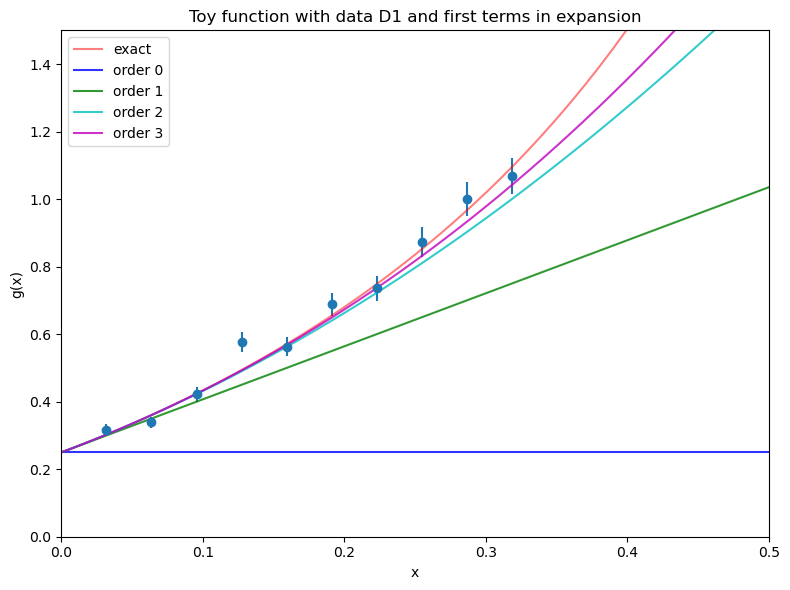

In [4]:


# Always make a figure to check!

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x_data_pts, y_data_pts, dy_data, fmt='o')
ax.set_xlabel(r'x')
ax.set_ylabel(r'g(x)')
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 1.5)

x_pts_all = np.arange(0., 1., .01)
ax.plot(x_pts_all, g_fun(x_pts_all), color='red', alpha=0.5, label='exact')
ax.set_title('Toy function with data D1 and first terms in expansion')

theta_true = np.array([0.25, 1.5707963, 2.4674011, 1.2919282, 4.0587121,
                       1.275082, 5.67486677])
colors = ['b', 'g', 'c', 'm', 'k', 'r', 'b']

n_dim = 4
for order in range(n_dim):
    ax.plot(x_pts_all, y_model(x_pts_all, theta_true[:n_dim], order+1), 
            label=f'order {order:d}', color=colors[order], alpha=0.8)

ax.legend()


fig.tight_layout()